# DATA WRANGLING PROJECT - UDACITY

## Project Overview

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. 

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) is a Twitter account that rates people's dogs with a humorous comment about the dog.

## Project Details

My tasks in this project are as follows:

**Data wrangling, which consists of:**
* Gathering data.
* Assessing data
* Cleaning data
* Storing, analyzing, and visualizing the wrangled data
* Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations



#### Importing libraries

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy 

## Gathering data 

#### 1st source

In [393]:
# Reading document to extract the tweet id
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2nd source

In [8]:
# Extracting the tweet image prediction from Udacity's server
image_prediction = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

In [14]:
# Saving extracted content into a tsv
import io
rawData = pd.read_csv(io.StringIO(image_prediction.decode('utf-8')), sep='\t')
rawData.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
# Saving the dataframe into a tsv file
rawData.to_csv('image_prediction.tsv',sep='\t',index=False)

In [17]:
predictions_df = pd.read_csv('image_prediction.tsv', sep='\t')
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3rd source

In [5]:
# Extracting the tweetid from df
tweets_id = df.tweet_id.values
tweets_id

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [7]:
# extracting the data from the api

import timeit
import json

consumer_key =  'YOUR CONSUMER KEY'
consumer_secret =  'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET TOKEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

# Querying Twitter API for each tweet id
count = 0
fails_dict = {}
start = timeit.timeit()

# Saving each tweet as a new line in .txt
with open('tweet_json.txt', 'w') as outfile:
    for tweet in tweets_id:
        count += 1
        print(f'{str(count)}: {str(tweet)}')
        try:
            tweet = api.get_status(tweet, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet] = e
            pass

end = timeit.timeit()
print(end - start)
print(fails_dict)



1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [45]:
# Reading the txt file line by line into a dataframe

#creating an empty list
list_of_lists = []

with open('tweet_json.txt') as f:
    for line in f:
        # remove whitespace at the start and the newline at the end
        json_data = json.loads(line)        
        list_of_lists.append([json_data["id"],json_data["retweet_count"], json_data["favorite_count"]])
        


tweet_df = pd.DataFrame(list_of_lists, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_df.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7487,35460
1,892177421306343426,5557,30678
2,891815181378084864,3679,23077
3,891689557279858688,7664,38737
4,891327558926688256,8264,37007


#### Summary of Gathering
The dataframe from the 3 different sources were built:

`twitter_df`

`predictions_df`

`tweet_df`

## Assessing data

In this section I will detect and assess at least 8 quality issues and 2 tidiness issues both programmatically and visually.

##### Assessing visually our data

In [50]:
# Extracting 20 random samples from twitter_df dataframe
twitter_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671186162...,10,10,Sparky,None,None,None,None
401,824663926340194305,NaN,NaN,2017-01-26 17:02:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. Named after the volleyball. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824663926...,13,10,Wilson,None,None,None,None
757,778624900596654080,NaN,NaN,2016-09-21 16:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778624900...,11,10,Penny,None,None,None,None
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,pupper,None
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947...,11,10,a,None,None,None,None
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bruce. He never backs d...,7.902771e+17,4.196984e+09,2016-10-23 19:42:02 +0000,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None
1403,699413908797464576,NaN,NaN,2016-02-16 02:04:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,None,None,None,None
1250,711008018775851008,NaN,NaN,2016-03-19 01:54:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,None,None,pupper,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
1198,716802964044845056,NaN,NaN,2016-04-04 01:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Link. He struggles with couches. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716802964...,10,10,Link,None,None,None,None


In [52]:
# Visualizing prediction_df dataframe
predictions_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
282,671134062904504320,https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg,1,Shih-Tzu,0.180380,True,golden_retriever,0.180194,True,Labrador_retriever,0.173656,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1689,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True
2024,881666595344535552,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,1,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,0.160739,True
937,703611486317502464,https://pbs.twimg.com/media/CcO66OjXEAASXmH.jpg,1,Pembroke,0.756441,True,basenji,0.126621,True,Cardigan,0.080117,True
1430,773191612633579521,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,Blenheim_spaniel,0.427766,True,Shih-Tzu,0.219256,True,Welsh_springer_spaniel,0.144614,True
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
764,688916208532455424,https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg,1,Pembroke,0.430544,True,red_fox,0.206576,False,Pomeranian,0.154352,True
1125,727314416056803329,https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg,2,toy_poodle,0.827469,True,miniature_poodle,0.160760,True,Tibetan_terrier,0.001731,True


In [54]:
# Visualizing tweet_df
tweet_df.sample(10)

,tweet_id,retweet_count,favorite_count
1497,690690673629138944,798,2264
797,770655142660169732,1747,7259
1179,716285507865542656,1014,2690
1158,718971898235854848,1044,3382
1609,684241637099323392,3166,7908
1260,708479650088034305,660,2478
671,787717603741622272,2763,10249
1877,674644256330530816,258,983
810,768596291618299904,1265,4991
2028,671485057807351808,220,714


##### Assessing programmatically our data

**twitter_df dataframe**

In [55]:
twitter_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [63]:
twitter_df.shape, twitter_df.isna().sum()

((2356, 17),
 tweet_id                         0
 in_reply_to_status_id         2278
 in_reply_to_user_id           2278
 timestamp                        0
 source                           0
 text                             0
 retweeted_status_id           2175
 retweeted_status_user_id      2175
 retweeted_status_timestamp    2175
 expanded_urls                   59
 rating_numerator                 0
 rating_denominator               0
 name                             0
 doggo                            0
 floofer                          0
 pupper                           0
 puppo                            0
 dtype: int64)

In [64]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [68]:
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [69]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [74]:
sum(twitter_df.tweet_id.duplicated())

0

**predictions_df dataframe** 

In [77]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
# Looking at the datatype of the columns
predictions_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [81]:
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**tweet_df dataframe**

In [82]:
tweet_df.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7487,35460
1,892177421306343426,5557,30678
2,891815181378084864,3679,23077


In [83]:
tweet_df.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [85]:
sum(tweet_df.tweet_id.duplicated())

0

In [86]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2632.538825,7405.640069
std,6.823170e+16,4452.641010,11503.792011
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,534.500000,1287.000000
50%,7.182469e+17,1230.000000,3215.000000
75%,7.986692e+17,3055.000000,9063.500000
max,8.924206e+17,75646.000000,152811.000000


#### Quality issues identified

**`twitter_df` table**

* Wrong names such as 'his', 'a', 'very', 'unacceptable', among others.
* `timestamp` and `retweeted_status_timestamp` are not time type.
* `tweet_id`, `retweeted_status_id`, and `retweeted_status_user_id` are not string type.
* Many missing values in columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, 
`retweeted_status_user_id`, and `retweeted_status_timestamp`. Column `expanded_urls` also has missing values but in a less scale.
* Nulls represented as 'None' on `name`, `doggo`, `floofer`, `pupper`,and `puppo` columns.
* High values on `rating_numerator` column that seems to be wrong such as 1776, 960, 666....
* Wrong values on `rating_denominator` column different of 10

**predictions_df table**

* Name of columns `p1`, `p1_conf` etc do not properly describe the values they represent.
* `tweet_id` is an integer type instead of string.
* Uppercase and lowercase for the race of the dogs on `p1`, `p2`, and `p3` columns

**tweet_df table**
* `tweet_id` is an integer type

#### Tidiness issues

* `rating numerator` and `rating denominator` in twitter_df table can be combined into one simple column named such as `rating rate`.
* `doggo`, `floofer`, `pupper`, and `puppo` columns could be eliminated or attached to one column `dog_stage`.
* Tweet_df table and predictions_df could be part of twitter_df table without breaking too much tidiness features

## Cleaning Data

In [398]:
# Making a copy of the dataframes
twitter_copy = twitter_df.copy()
predictions_copy = predictions_df.copy()
tweet_copy = tweet_df.copy()

### Missing values / non-wanted values

**Define**

- Drop rows in twitter_copy table that are retweets. They are te ones with non-null values on retweeted... columns.
- Drop columns with more than 75% of missing values such as the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns.

**Code**

In [399]:
# Fixing wrong representation of null values on table twitter_copy for columns name, doggo, floofer, pupper,and puppo 
#twitter_copy.replace(to_replace='None', value=np.nan, inplace=True)


# twitter_copy.doggo.replace('None', '', inplace=True)
# twitter_copy.floofer.replace('None', '', inplace=True)
# twitter_copy.pupper.replace('None', '', inplace=True)
# twitter_copy.puppo.replace('None', '', inplace=True)

# twitter_copy.head()

In [400]:
twitter_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

 As we can notice, some columns have more than 75% of missing values, which makes them useless for any 
 further analysis with them, as long as we don't have a way to find such information

In [401]:
# Looking for the index of the retweets
retweet_index = twitter_copy.query("retweeted_status_user_id != 'NaN'").index
len(retweet_index), retweet_index

(181,
 Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
             ...
              926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
            dtype='int64', length=181))

In [402]:
# Dropping rows with the retweets
twitter_copy.drop(retweet_index, axis = 0, inplace=True)


# Testing to see if there is more non null values in the retweeted_status_user_id column
retweet_index = twitter_copy.query("retweeted_status_user_id != 'NaN'").index
len(retweet_index), retweet_index

(0, Int64Index([], dtype='int64'))

In [403]:
# Droping the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id']
twitter_copy.drop(columns, axis=1, inplace=True)

**Test**

In [404]:
twitter_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness


**Define**

1. Fix quality issue of values on rating_denominator different than 10.
2. Fix quality issues with values of rating_numerator that looks too high or weird.
3. Combine rating_numerator and rating_denominator in one column names rating
4. Drop `rating_numerator` and `rating_denominator`.

**1. Code**

**Fix quality issues of high values in denominator over 10**

I filter out the rows with denominator values over 10

In [405]:
twitter_copy = twitter_copy.query("rating_denominator == 10")
len(twitter_copy)

2153

**1.Test**

In [406]:
twitter_copy.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

**2. Code**

**Fix quality issues of weird/high values in numerator**

I identify the weird values and filter them out. 

In [407]:
twitter_copy.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
75        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [408]:
# We don't have many values over 15, so I will choice values over 15 are outliers for this feature
len(twitter_copy.query("rating_numerator >= 15"))

10

In [409]:
# Filtering out the value in the rating_numerator over 15
twitter_copy = twitter_copy.query("rating_numerator < 15")

**2.Test**

In [410]:
# Testing if we have 10 values less than 2153
len(twitter_copy)

2143

**3.Code**

**Combine rating_numerator and rating_denominator in one column names rating**

I divide the rating numerator with the rating denominator into a rating column

In [411]:
twitter_copy['rating'] = twitter_copy['rating_numerator'] / twitter_copy['rating_denominator']


**3.Test**

In [412]:
twitter_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


**4.Code**

**Drop the rating_numerator and rating_denominator columns**

In [413]:
columns = ['rating_numerator', 'rating_denominator']
twitter_copy.drop(columns, axis=1, inplace=True)

**4.Test**

In [414]:
twitter_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2


**Define**

- Turning doggo, floofer, pupper and puppo columns into a categorical column called dog_stage

**Code**

In [415]:
# Replace the 'None' values by empty spaces

twitter_copy.doggo.replace('None', '', inplace=True)
twitter_copy.floofer.replace('None', '', inplace=True)
twitter_copy.pupper.replace('None', '', inplace=True)
twitter_copy.puppo.replace('None', '', inplace=True)
 
# # Getting the indexes for the values non-nulls
# index_doggo = twitter_copy.query("doggo == 'doggo'").index
# index_floofer = twitter_copy.query("floofer == 'floofer'").index
# index_pupper = twitter_copy.query("pupper == 'pupper'").index
# index_puppo = twitter_copy.query("puppo == 'puppo'").index

In [416]:
# Merging the values in one column
twitter_copy['dog_stage'] = twitter_copy.doggo + twitter_copy.floofer + twitter_copy.pupper + twitter_copy.puppo

# # Adding the values with the extracted indexes for each value
# twitter_copy.loc[index_doggo, 'dog_stage'] = 'doggo'
# twitter_copy.loc[index_floofer, 'dog_stage'] = 'floofer'
# twitter_copy.loc[index_pupper, 'dog_stage'] = 'pupper'
# twitter_copy.loc[index_puppo, 'dog_stage'] = 'puppo'

In [417]:
twitter_copy['dog_stage'].value_counts()

                1800
pupper           223
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [418]:
# handling multiple stages
twitter_copy.loc[twitter_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_copy.loc[twitter_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_copy.loc[twitter_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


In [419]:
# Dropping the doggo, floofer, pupper, puppo columns
columns = ['doggo','floofer','pupper','puppo']
twitter_copy.drop(columns, axis=1, inplace=True)

In [422]:
# handle missing values in dog_stage column
twitter_copy.loc[twitter_copy.dog_stage == '', 'dog_stage'] = np.nan

**Test**

In [423]:
twitter_copy['dog_stage'].value_counts()

pupper            223
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [424]:
twitter_copy.sample(8)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
2263,667544320556335104,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,Kial,1.0,NaN
1778,677895101218201600,2015-12-18 16:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this was terrifying. Really spooked me up...,https://twitter.com/dog_rates/status/677895101...,None,0.9,NaN
94,874012996292530176,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,Sebastian,1.3,puppo
861,763103485927849985,2016-08-09 20:03:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's a Butterflop Hufflepoof. ...,https://twitter.com/dog_rates/status/763103485...,Belle,1.0,NaN
326,833826103416520705,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,https://twitter.com/dog_rates/status/833826103...,Charlie,1.3,NaN
2027,671874878652489728,2015-12-02 02:13:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She was specifically told not get...,https://twitter.com/dog_rates/status/671874878...,Mia,1.0,NaN
1463,694669722378485760,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,https://twitter.com/dog_rates/status/694669722...,Phil,1.2,NaN
412,822975315408461824,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,https://twitter.com/dog_rates/status/822975315...,Albus,1.2,NaN


In [425]:
twitter_copy.dog_stage.isnull().sum()

1800

**Define**

* Merge tweet_df and predictions_df tables into twitter_df

**Code**

In [426]:
# Merging tweets_df with twitter_df. 
twitter_copy = pd.merge(twitter_copy, tweet_df, on=['tweet_id'])

In [427]:
# Merging tweets_df with twitter_df. I will use inner join because we want to keep only the tweets with images
twitter_copy = pd.merge(twitter_copy, predictions_df, on=['tweet_id'])

**Test**

In [428]:
twitter_copy.sample(8)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
896,718613305783398402,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carper. He's a Tortellini Angiosperm. ...,https://twitter.com/dog_rates/status/718613305...,Carper,1.1,NaN,465,2366,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True
1522,674646392044941312,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,None,0.5,NaN,459,1361,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
435,797236660651966464,2016-11-12 00:36:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pancake. She loves Batman and winks li...,https://twitter.com/dog_rates/status/797236660...,Pancake,1.2,NaN,6554,19938,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,Border_collie,0.100844,True,kelpie,0.048368,True
610,766008592277377025,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,https://twitter.com/dog_rates/status/766008592...,Angel,1.1,NaN,491,3697,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
1032,704364645503647744,2016-02-29 17:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He's a Beneplop Cumbers...,https://twitter.com/dog_rates/status/704364645...,Bisquick,1.2,NaN,3449,7782,https://pbs.twimg.com/media/CcZn6RWWIAAmOZG.jpg,1,Pembroke,0.980695,True,Cardigan,0.018504,True,Chihuahua,0.000215,True
729,748346686624440324,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",https://twitter.com/dog_rates/status/748346686...,None,1.0,NaN,1208,5117,https://pbs.twimg.com/media/CmKpVtlWAAEnyHm.jpg,1,borzoi,0.596455,True,whippet,0.231428,True,Saluki,0.058261,True
1387,678798276842360832,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,https://twitter.com/dog_rates/status/678798276...,Linda,0.7,NaN,1111,3348,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1,Airedale,0.583122,True,silky_terrier,0.129567,True,Lakeland_terrier,0.094727,True
374,812466873996607488,2016-12-24 01:16:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mary. She's desperately trying to recr...,https://twitter.com/dog_rates/status/812466873...,Mary,1.2,NaN,1926,7945,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True


### Quality



**Define**
 - Fix datatype of timestamp

**Code**

In [429]:
twitter_copy.dtypes

tweet_id            int64
timestamp          object
source             object
text               object
expanded_urls      object
name               object
rating            float64
dog_stage          object
retweet_count       int64
favorite_count      int64
jpg_url            object
img_num             int64
p1                 object
p1_conf           float64
p1_dog               bool
p2                 object
p2_conf           float64
p2_dog               bool
p3                 object
p3_conf           float64
p3_dog               bool
dtype: object

In [430]:
twitter_copy['timestamp'] = pd.to_datetime(twitter_copy['timestamp'])

**Test**

In [431]:
twitter_copy.dtypes

tweet_id                        int64
timestamp         datetime64[ns, UTC]
source                         object
text                           object
expanded_urls                  object
name                           object
rating                        float64
dog_stage                      object
retweet_count                   int64
favorite_count                  int64
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf                       float64
p3_dog                           bool
dtype: object

**Define**

Change datatype of tweet_id to string

**Code**

In [432]:
twitter_copy['tweet_id'] = twitter_copy['tweet_id'].astype(str)

**Test**

In [433]:
twitter_copy.dtypes

tweet_id                       object
timestamp         datetime64[ns, UTC]
source                         object
text                           object
expanded_urls                  object
name                           object
rating                        float64
dog_stage                      object
retweet_count                   int64
favorite_count                  int64
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf                       float64
p3_dog                           bool
dtype: object

**Define**

Turn the columns p1, p2, and p3 to lowercase

**Code**

In [434]:
# Turning values of the columns in lowercase

twitter_copy['p1'] = twitter_copy['p1'].str.lower()
twitter_copy['p2'] = twitter_copy['p2'].str.lower()
twitter_copy['p3'] = twitter_copy['p3'].str.lower()


**Test**

In [435]:
# Checking random samples of the dataframe to 

twitter_copy.sample(8)


,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
789,740359016048689152,2016-06-08 01:45:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,https://twitter.com/dog_rates/status/740359016...,Chase,0.9,NaN,839,3216,https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg,1,golden_retriever,0.863687,True,kuvasz,0.048590,True,labrador_retriever,0.047397,True
1277,684538444857667585,2016-01-06 00:54:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,None,1.2,NaN,923,2591,https://pbs.twimg.com/ext_tw_video_thumb/68453...,1,chihuahua,0.702583,True,siamese_cat,0.068218,False,macaque,0.043325,False
533,780192070812196864,2016-09-25 23:47:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/780192070...,None,1.1,NaN,2216,8652,https://pbs.twimg.com/media/CtPMhwvXYAIt6NG.jpg,1,vizsla,0.144012,True,mongoose,0.091474,False,hatchet,0.073545,False
205,841314665196081154,2017-03-13 15:47:01+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,https://twitter.com/dog_rates/status/841314665...,Max,1.3,NaN,4502,15490,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,afghan_hound,0.903712,True,saluki,0.035215,True,bloodhound,0.026565,True
1664,671511350426865664,2015-12-01 02:09:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Hammond. He's just a wee lil pup....,https://twitter.com/dog_rates/status/671511350...,Hammond,0.8,NaN,656,1494,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,1,hermit_crab,0.625409,False,tick,0.127333,False,snail,0.097916,False
936,712668654853337088,2016-03-23 15:53:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,https://twitter.com/dog_rates/status/712668654...,Sunny,1.0,NaN,1178,4063,https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg,1,labrador_retriever,0.829058,True,golden_retriever,0.038664,True,chihuahua,0.026221,True
1913,666983947667116034,2015-11-18 14:18:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,https://twitter.com/dog_rates/status/666983947...,a,1.1,NaN,901,2373,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
1508,674790488185167872,2015-12-10 03:19:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",ER... MER... GERD 13/10 https://t.co/L1puJISV1a,https://twitter.com/dog_rates/status/674790488...,None,1.3,NaN,236,1044,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,labrador_retriever,0.801903,True,chesapeake_bay_retriever,0.193575,True,rottweiler,0.001193,True


**Define**

Change name of columns p1, p1_conf, p2, p2_conf, p3 and p3_conf for names that describe better the type of data of the column

**Code**

In [436]:
twitter_copy.rename(columns={'p1': 'prediction_algorithm_1', 'p1_conf': 'confidence_algorithm_1',
                            'p2':'prediction_algorithm_2', 'p2_conf':'confidence_algorithm_2',
                            'p3':'prediction_algorithm_3', 'p3_conf':'confidence_algorithm_3'}, inplace=True)

**Test**

In [437]:
twitter_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_algorithm_1,confidence_algorithm_1,p1_dog,prediction_algorithm_2,confidence_algorithm_2,p2_dog,prediction_algorithm_3,confidence_algorithm_3,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,7487,35460,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,5557,30678,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,3679,23077,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,7664,38737,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,8264,37007,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


**Define**

Identify wrong name of dogs such as 'his', 'a', 'very', 'unacceptable', 'such','the', 'an', among others.
Replace these values by NaN so they are defined as unknown values.

**Code**

In [438]:
# Identifying weird values in name column
twitter_copy.name.value_counts()

None              532
a                  54
Charlie            10
Cooper             10
Oliver             10
Tucker              9
Lucy                9
Penny               9
Sadie               8
Winston             8
Lola                7
Daisy               7
the                 7
Toby                7
Bo                  6
Bella               6
Stanley             6
Koda                6
Jax                 6
Leo                 5
an                  5
Louis               5
Bailey              5
Rusty               5
Buddy               5
Milo                5
Chester             5
Oscar               5
Dave                5
Scout               5
Oakley              4
Archie              4
Cassie              4
Finn                4
Bentley             4
very                4
Dexter              4
Jerry               4
Winnie              4
Scooter             4
George              4
Gary                4
Jack                4
Gus                 4
one                 4
Alfie     

In [439]:
twitter_copy.name.isnull().sum()

0

In [440]:
twitter_copy.name.str.islower().sum()

95

In [441]:
twitter_copy.name.tail(50)


1914          None
1915          None
1916          None
1917          Jeph
1918       Jockson
1919          None
1920             a
1921         Josep
1922         Lugan
1923             a
1924    Christoper
1925          None
1926       Jimothy
1927      Kreggory
1928         Scout
1929          None
1930          None
1931          None
1932          None
1933          None
1934        Walter
1935         quite
1936             a
1937          None
1938          None
1939          None
1940          None
1941          None
1942            an
1943             a
1944          None
1945          None
1946          None
1947          None
1948          None
1949          None
1950          None
1951          None
1952          None
1953           the
1954           the
1955             a
1956             a
1957            an
1958             a
1959          None
1960             a
1961             a
1962             a
1963          None
Name: name, dtype: object

In [442]:
# A peculiarity for the wrong values of the name column is that wrong values are in lowercase
# I will proceed to replace lowercase values in name column by NaN
# We have 532 null values and 95 lowercase values, so after I finish this process, I should have a total
# of 627 null values
twitter_copy['name'] = twitter_copy['name'].apply(lambda x: np.nan if str(x).islower() else x)

**Test**



In [443]:
# Total of 627 null values as predicted

twitter_copy.name.isnull().sum()

95

### Summary of fixed quality issues

**`twitter_df` table**

* Done ---- Wrong names such as 'his', 'a', 'very', 'unacceptable', among others.
* Done ---- `timestamp` and `retweeted_status_timestamp` are not time type.
* Done ----`tweet_id`, `retweeted_status_id`, and `retweeted_status_user_id` are not string type.
* Done ---- Many missing values in columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`. Column `expanded_urls` also has missing values but in a less scale.
* Done ---- Nulls represented as 'None' on `name`, `doggo`, `floofer`, `pupper`,and `puppo` columns.
* Done --- High values on `rating_numerator` column that seems to be wrong such as 1776, 960, 666....
* Done ---- Wrong values on `rating_denominator` column different of 10

**predictions_df table**

* Done ---- Name of columns `p1`, `p1_conf` etc do not properly describe the values they represent.
* `tweet_id` is an integer type instead of string.
* Done ---- Uppercase and lowercase for the race of the dogs on `p1`, `p2`, and `p3` columns

**tweet_df table**
* Done ---- `tweet_id` is an integer type

## Storing clean dataset

In [444]:
twitter_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_algorithm_1,confidence_algorithm_1,p1_dog,prediction_algorithm_2,confidence_algorithm_2,p2_dog,prediction_algorithm_3,confidence_algorithm_3,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,7487,35460,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,5557,30678,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,3679,23077,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,7664,38737,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,8264,37007,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [445]:
twitter_copy.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing

In [446]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_algorithm_1,confidence_algorithm_1,p1_dog,prediction_algorithm_2,confidence_algorithm_2,p2_dog,prediction_algorithm_3,confidence_algorithm_3,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,7487,35460,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,5557,30678,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,3679,23077,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,7664,38737,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,8264,37007,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


#### Summary of algorithms

In [447]:
import seaborn as sns
%matplotlib inline

In [448]:
df.describe()

,tweet_id,rating,retweet_count,favorite_count,img_num,confidence_algorithm_1,confidence_algorithm_2,confidence_algorithm_3
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,7.358024e+17,1.054277,2385.843686,8106.773931,1.203666,0.593261,1.349405e-01,6.032184e-02
std,6.759778e+16,0.218589,4280.685287,11960.668439,0.562241,0.272049,1.007694e-01,5.083697e-02
min,6.660209e+17,0.000000,11.000000,69.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757330e+17,1.000000,534.750000,1714.750000,1.000000,0.360361,5.419487e-02,1.616933e-02
50%,7.081401e+17,1.100000,1145.500000,3649.000000,1.000000,0.587357,1.186345e-01,4.952715e-02
75%,7.880674e+17,1.200000,2728.250000,10079.750000,1.000000,0.843827,1.956673e-01,9.198323e-02
max,8.924206e+17,1.400000,75646.000000,152811.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


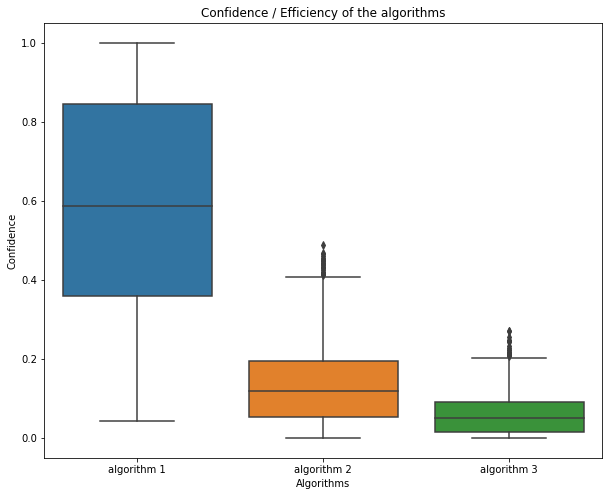

In [449]:
plt.figure(figsize=(10,8))
sns.boxplot(x=['algorithm 1', 'algorithm 2', 'algorithm 3'], y = [df.confidence_algorithm_1, df.confidence_algorithm_2, df.confidence_algorithm_3])
plt.title("Confidence / Efficiency of the algorithms")
plt.ylabel("Confidence")
plt.xlabel("Algorithms")
plt.savefig('algorithms.png', dpi=300, bbox_inches='tight')
plt.show();

**Insight**

Algorithm 1 had better results than the other algorithms in predicting the race of the dog. They had the better confidence values

#### Race of dogs

In [450]:
# Using the predictions of algorithm 1 to query the tweets that were predicted as dogs by the algorithm
dogs_df = df.query("p1_dog == True")
dogs_df.shape

(1452, 21)

In [451]:
most_common_dogs = dogs_df.prediction_algorithm_1.value_counts()[:10]

In [452]:
most_common_dogs

golden_retriever      135
labrador_retriever     90
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                39
toy_poodle             37
pomeranian             37
malamute               29
Name: prediction_algorithm_1, dtype: int64

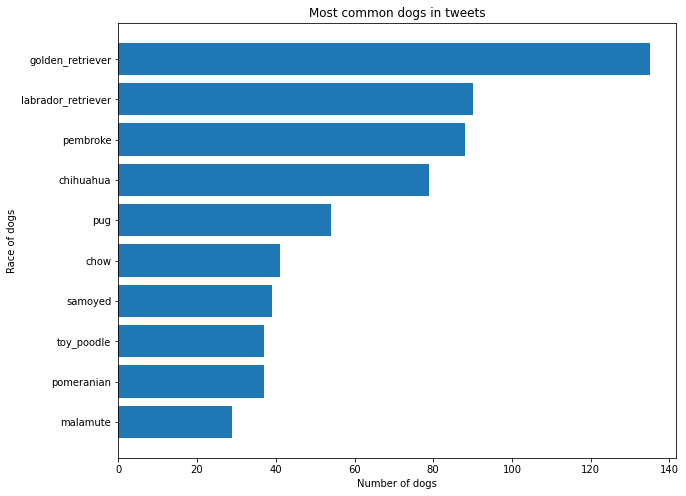

In [453]:
plt.figure(figsize=(10, 8))
plt.barh(y = most_common_dogs.index[::-1], width = most_common_dogs[::-1] )
plt.xlabel('Number of dogs')
plt.ylabel('Race of dogs')
plt.title("Most common dogs in tweets")
plt.savefig('most_common_dogs.png', dpi=300, bbox_inches='tight')
plt.show();

#### Insight

The most common races of dogs on WeRateDogs twitter are golden_retriever, with a huge difference with the second one, which is labrador_retriever and pembroke

In [454]:
favorite_count_df = dogs_df.groupby(by='prediction_algorithm_1')[['favorite_count']].sum()
top_10_fav = favorite_count_df.sort_values(by = 'favorite_count', ascending=False)[:10]
top_10_fav

,favorite_count
prediction_algorithm_1,
golden_retriever,1506445
labrador_retriever,961580
pembroke,910637
chihuahua,629996
samoyed,469921
french_bulldog,428495
chow,371521
pug,285594
cocker_spaniel,282121


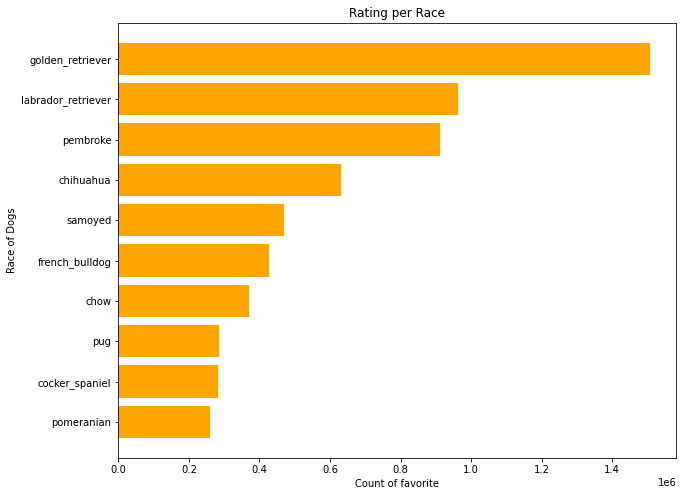

In [455]:
# Ploting the dog races with best ratings
plt.figure(figsize=(10,8))
plt.barh(y = top_10_fav.index[::-1], width = top_10_fav.values.flatten()[::-1], color='orange')
plt.xlabel('Count of favorite')
plt.ylabel('Race of Dogs')
plt.title("Rating per Race")
plt.savefig('top_favorite.png', dpi=300, bbox_inches='tight')
plt.show();

#### Insight

The top 10 favorite dogs coincide with the top 10 most common dogs

**Ratings per race of dogs**

In [456]:
# Grouping the data by the predicted dog race and the average of the ratings
rating_per_race = dogs_df.groupby(by='prediction_algorithm_1')[['rating']].mean()

In [457]:
best_rated_dogs = rating_per_race.sort_values(['rating'], ascending=False)[:10]


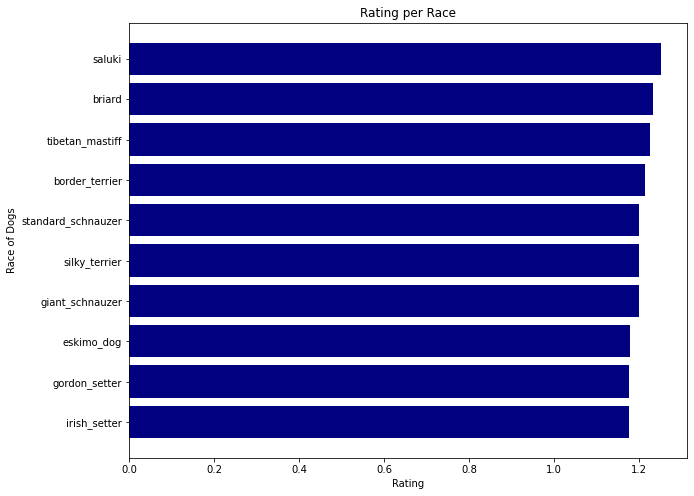

In [458]:
# Ploting the dog races with best ratings
plt.figure(figsize=(10,8))
plt.barh(y = best_rated_dogs.index[::-1], width = best_rated_dogs.values.flatten()[::-1], color='navy')
plt.xlabel('Rating')
plt.ylabel('Race of Dogs')
plt.title("Rating per Race")
plt.savefig('top_rate.png', dpi=300, bbox_inches='tight')
plt.show();

#### Insight

With this table I can notice how the best rated dogs are not necessarily the one with higher number of retweets and favorite count. Most probably this is due the race dogs with most retweets are the most repeated dog race in the tweets, so that's why they get so many retweets. In change, races such as saluki and briard are more uncommon to appear so they receive less views and retweets as result.